# Loan Status Prediction

## Imports

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read csv data
train_df = pd.read_csv('/content/drive/MyDrive/2024-25/Advanced-Programming-and-Machine-Learning-IITM/final_project/Loan Status Prediction/Loan_Status_train.csv')

In [ ]:
no_of_rows = len(train_df)
no_of_rows

614

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* In the given data we have 12 independent features(columns) and 614 rows.

* The 12 independent columns are:
    1. Loan_ID
    2. Gender
    3. Married
    4. Dependents
    5. Education
    6. Self_Employed
    7. ApplicantIncome
    8. CoapplicantIncome
    9. LoanAmount
    10. Loan_Amount_Term
    11. Credit_History
    12. Propert_Area

Let's perform a EDA on these features and find more about data.

## Exploratory Data Analysis and Data Pre-Processing

### 1. Loan ID
* Loan id is used to identify the application made.
* It doesn't effect our prediction in any way because whatever is the loan id number it won't have any impacts on loan decision. So we will ignore this column

In [ ]:
train_df = train_df.drop('Loan_ID', axis=1)

### 2. Gender

* Gender is a nominal qualitative data which we need to encode to binary.

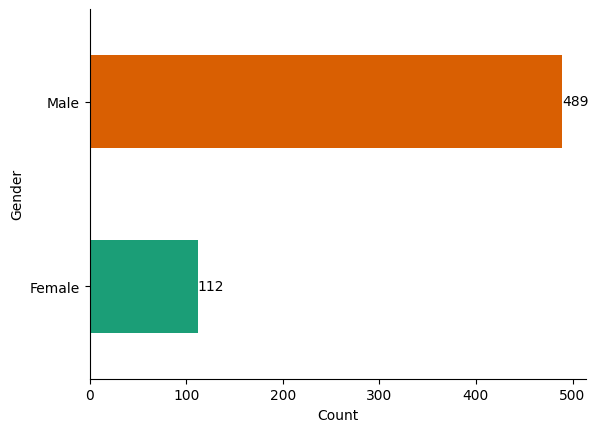

In [ ]:
ax = train_df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

for i, bar in enumerate(ax.patches):
  ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
    str(bar.get_width()), ha='left', va='center')

plt.xlabel('Count')
plt.show()

* There are 489 male applications and 112 female applicants.

In [ ]:
train_df['Gender'].isnull().sum()

13

* 13 Applicants gender is not mentioned leading to null values in the data. We will imput these null values

In [ ]:
train_df['Gender'] = train_df['Gender'].replace({'Male': 0, 'Female': 1})
imputer = KNNImputer(n_neighbors=1)

train_df['Gender'] = imputer.fit_transform(train_df[['Gender']])
train_df['Gender'].isnull().sum()

0

### 3. Married

* Married column have only 2 kinds of possible values married or not. This is a binary qualitative data.

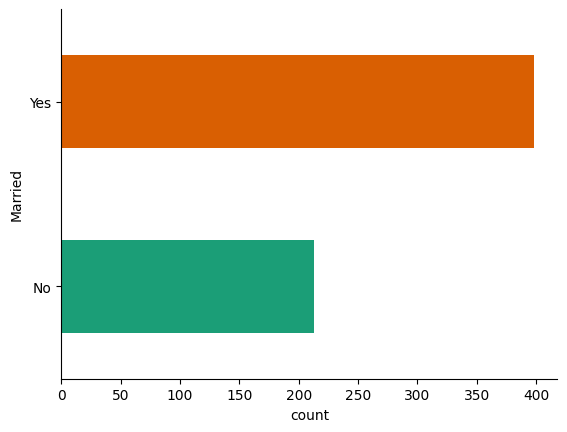

In [ ]:
train_df.groupby('Married').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('count')
plt.show()

In [ ]:
train_df['Married'].isnull().sum()

3

* We have 3 null values, since most number of applicants are married we will fill this null values are married.

In [ ]:
train_df['Married'] = train_df['Married'].replace({'Yes': 1, 'No': 0})
train_df['Married'] = train_df['Married'].fillna(1)
train_df['Married'].isnull().sum()

0

### 4. Dependents

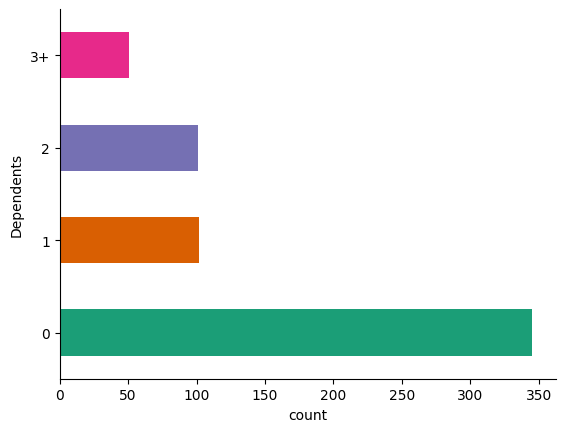

In [ ]:
train_df.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('count')
plt.show()

* Dependents refer to the number of people applicant has to take care of like children, parents, wife, etc.

In [ ]:
train_df['Dependents'].isnull().sum()

15

* There are 15 null values for dependents so to fill these I will give 0 dependents to unmarried people and 1 dependent to married people.

In [ ]:
train_df['Dependents'].fillna(train_df['Married'], inplace=True)
train_df['Dependents'] = train_df['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, 0.0 : 0, 1.0 : 1, '2' : 2, '3+' : 3}[x])

### 5. Education

* Education is also a binary qualitative data. There are only two possible values for this feature.

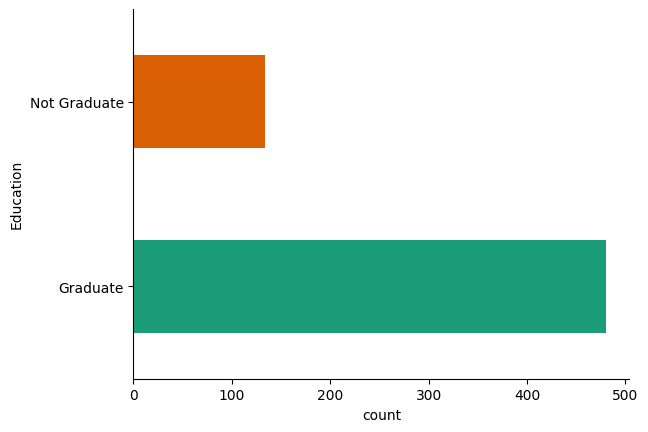

In [ ]:
train_df.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('count')
plt.show()

In [ ]:
train_df['Education'].isnull().sum()

0

* There are no null values for this column so we will encode this column with 0 if not graduated and 1 if graduated.

In [ ]:
train_df['Education'] = train_df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})

### 6. Self Employed

* Self Employed is also binary qualitative data because there are only two possible valies yes or no.

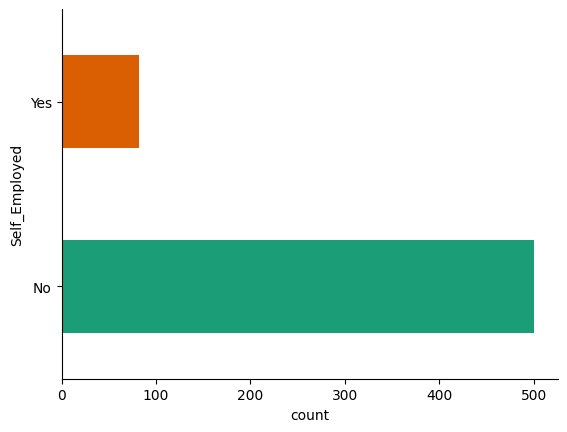

In [ ]:
train_df.groupby('Self_Employed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('count')
plt.show()

In [ ]:
train_df['Self_Employed'].isnull().sum()

32

* There are 32 null values in the column from the graph above majority of applicants are not self_employed so I am filling the null values with 0 to represent not self employed.

In [ ]:
train_df['Self_Employed'] = train_df['Self_Employed'].replace({'No': 0, 'Yes': 1})
train_df['Self_Employed'].fillna(0, inplace=True)

### 7. Applicant Income

* Applicant income is a continuous data.

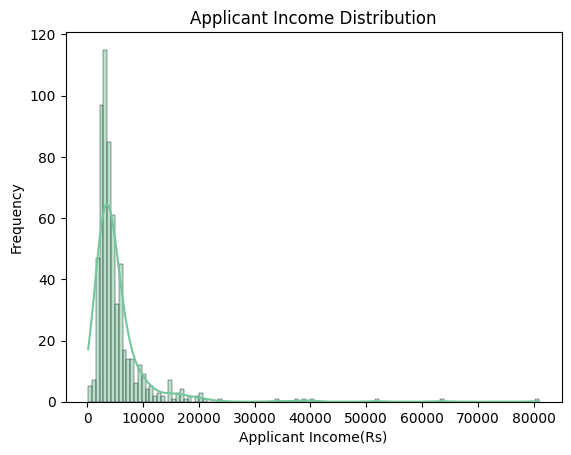

In [ ]:
sns.histplot(train_df['ApplicantIncome'], kde=True, color='#74c69d')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income(Rs)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train_df['ApplicantIncome'].isnull().sum()

0

* Applicant Income have no null values.

### 8. Co Applicant Income

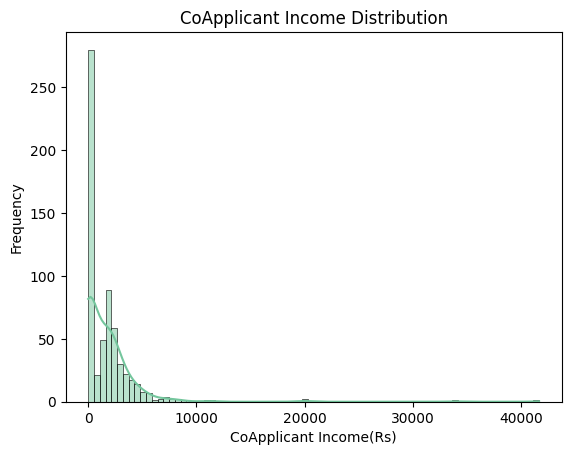

In [ ]:
sns.histplot(train_df['CoapplicantIncome'], kde=True, color='#74c69d')
plt.title('CoApplicant Income Distribution')
plt.xlabel('CoApplicant Income(Rs)')
plt.ylabel('Frequency')
plt.show()

* Coappliant data is continuous data as well.

In [ ]:
train_df['CoapplicantIncome'].isnull().sum()

0

* This columns also have no null values.

### 9. Loan Amount

* Loan Amount is a continous quantitaive data.

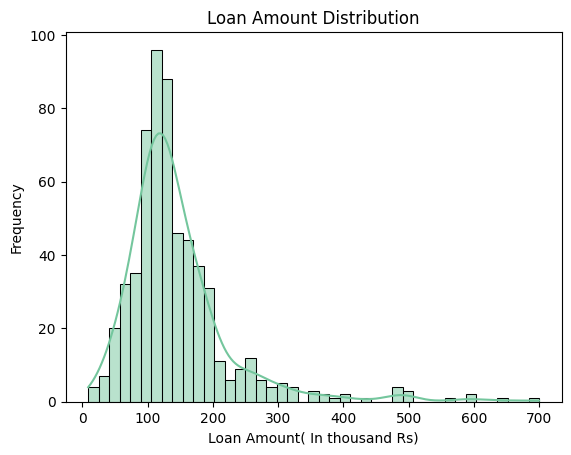

In [ ]:
sns.histplot(train_df['LoanAmount'], kde=True, color='#74c69d')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount( In thousand Rs)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train_df['LoanAmount'].isnull().sum()

22

* There are 22 null values in the Loan Amount Column. To solve this issue we will fill the null value with mean loan values bassed on approval status.

In [ ]:
train_df['LoanAmount'] = train_df.groupby('Loan_Status')['LoanAmount'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
train_df['LoanAmount']

0      144.294404
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

### 10. Loan Amount Term

* Loan amount term is discret quantitative data.

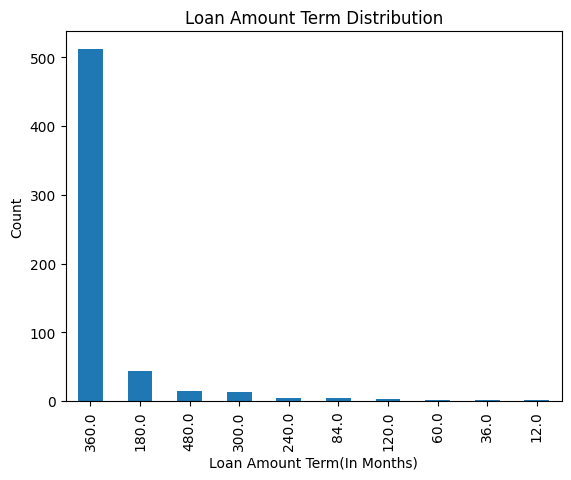

In [ ]:
train_df['Loan_Amount_Term'].value_counts().plot(kind='bar')
plt.title('Loan Amount Term Distribution')
plt.xlabel('Loan Amount Term(In Months)')
plt.ylabel('Count')
plt.show()

In [ ]:
train_df['Loan_Amount_Term'].isnull().sum()

14

* There are 14 null values, the most frequent amount term is 360. So we will fill null values with 360.

In [ ]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(value=360)

In [ ]:
train_df['Loan_Amount_Term'].isnull().sum()

0

### 11. Credit History

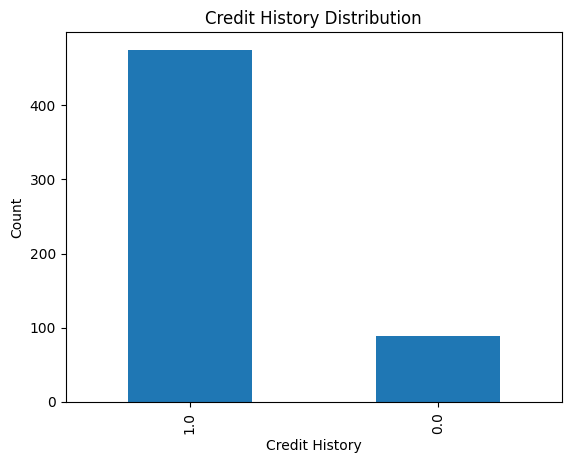

In [ ]:
train_df['Credit_History'].value_counts().plot(kind='bar')
plt.title('Credit History Distribution')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='LoanAmount', ylabel='Count'>

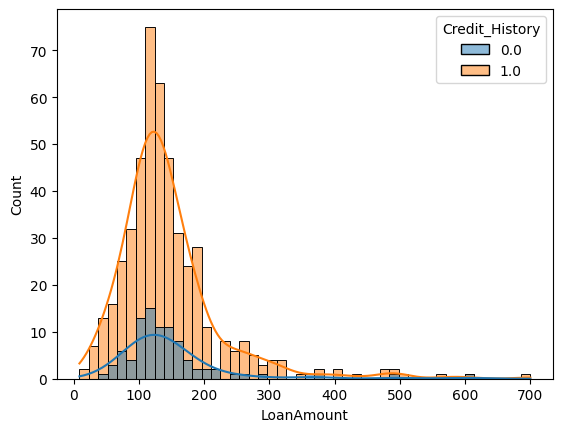

In [ ]:
sns.histplot(data=train_df, x="LoanAmount", hue="Credit_History", kde=True)

* Credit history is a binary qualitative data.

In [ ]:
train_df['Credit_History'].isnull().sum()

50

* There are 50 null values for Credit History. Since most applicants have credit history we will fill the null values with 1

In [ ]:
train_df['Credit_History'] = train_df['Credit_History'].fillna(value=1.0)

### Property Area

* Property Area is a ordinal qualitative data.

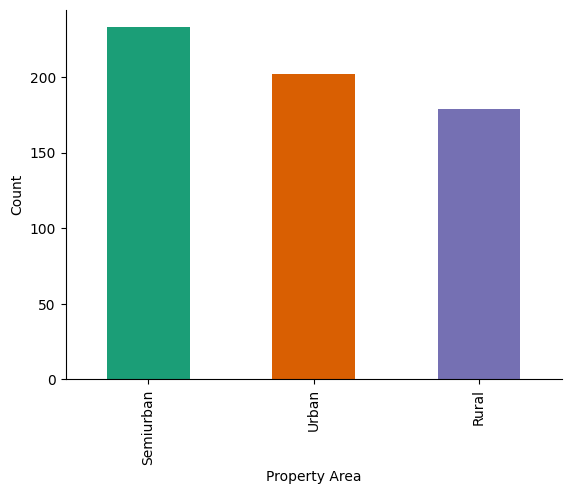

In [ ]:
train_df['Property_Area'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

In [ ]:
train_df['Property_Area'].isnull().sum()

0

* There are no null values for this column.
* But we need to encode this data to numerical format.

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Property_Area'], dtype=int)

## Bulding ML Model

* For feature selection, I am taking all into account except Loan_id


In [ ]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,0,1,0.0,5849,0.0,144.294404,360.0,1.0,Y,0,0,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,N,1,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Y,0,0,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Y,0,0,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Y,0,0,1


In [ ]:
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

## Finding Best Parameters

In [ ]:
# Building Decision Tree Classifier Model
model_01 = DecisionTreeClassifier(max_depth = 6)
model_01.fit(X_train, y_train)
print("Training Score : ", model_01.score(X_train, y_train) * 100)
print("Testing Score : ",model_01.score(X_test, y_test) * 100)

Training Score :  87.37270875763747
Testing Score :  73.17073170731707


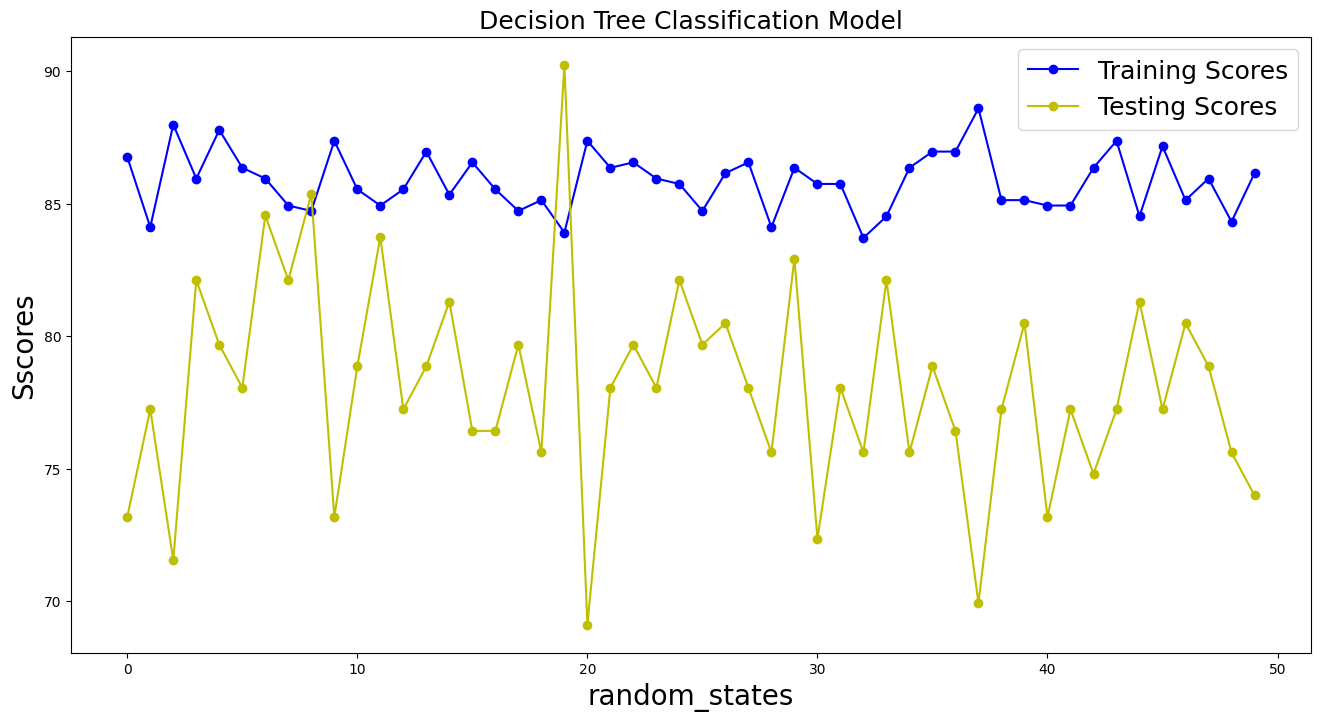

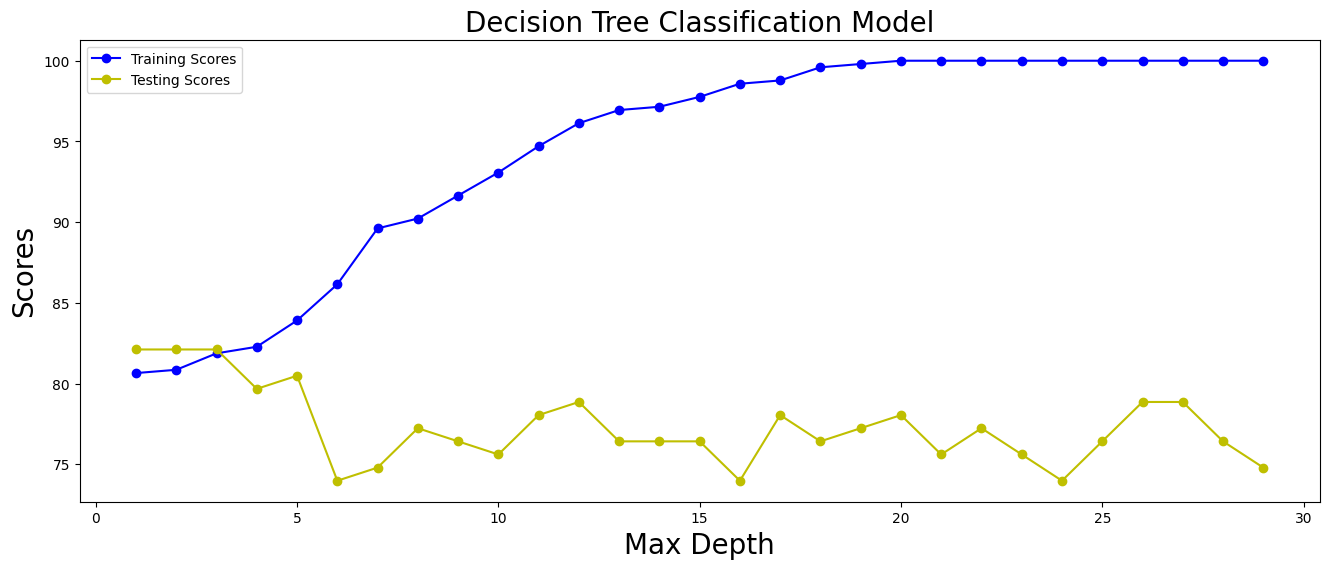

In [ ]:
random_states = list(range(50))
train_scores = []
test_scores = []
dt_model_dict = {}

for random_state in random_states:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
  classification_model = DecisionTreeClassifier(max_depth=6)
  classification_model.fit(X_train, y_train)
  train_score = classification_model.score(X_train, y_train) * 100
  test_score = classification_model.score(X_test, y_test) * 100
  dt_model_dict[random_state] = {'Train Score': train_score, 'Test Score': test_score}
  train_scores.append(train_score)
  test_scores.append(test_score)

max_depths = list(range(1, 30))
training_scores = []
testing_scores = []

for max_depth in max_depths:
  model_01 = DecisionTreeClassifier(max_depth=max_depth)
  model_01.fit(X_train, y_train)
  training_scores.append(model_01.score(X_train, y_train) * 100)
  testing_scores.append(model_01.score(X_test, y_test) * 100)

plt.figure(figsize=(16, 8))
plt.plot(random_states, train_scores, 'bo-')
plt.plot(random_states, test_scores, 'yo-')
plt.xlabel('random_states', fontsize=20)
plt.ylabel('Sscores', fontsize=20)
plt.title('Decision Tree Classification Model', fontsize=18)
plt.legend(labels=['Training Scores', 'Testing Scores'], fontsize=18)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(max_depths, training_scores, 'bo-')
plt.plot(max_depths, testing_scores, 'yo-')
plt.xlabel('Max Depth', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.title('Decision Tree Classification Model', fontsize=20)
plt.legend(labels=['Training Scores', 'Testing Scores'])
plt.show()

In [ ]:
classification_model = DecisionTreeClassifier(max_depth = 3)
classification_model.fit(X_train, y_train)
print("Training Score : ", classification_model.score(X_train, y_train) * 100)
print("Testing Score : ",classification_model.score(X_test, y_test) * 100)

Training Score :  81.87372708757637
Testing Score :  82.11382113821138


## Testing the model

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/2024-25/Advanced-Programming-and-Machine-Learning-IITM/final_project/Loan Status Prediction/Loan_Status_test.csv')

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/2024-25/Advanced-Programming-and-Machine-Learning-IITM/final_project/Loan Status Prediction/Loan_Status_test.csv')
test_df = test_df.drop('Loan_ID', axis=1)
test_df['Gender'] = test_df['Gender'].replace({'Male': 0, 'Female': 1})
test_df['Married'] = test_df['Married'].replace({'Yes': 1, 'No': 0})
test_df['Dependents'].fillna(test_df['Married'], inplace=True)
test_df['Dependents'] = test_df['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, 0.0 : 0, 1.0 : 1, '2' : 2, '3+' : 3}[x])
test_df['Education'] = test_df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
test_df['Self_Employed'] = test_df['Self_Employed'].replace({'No': 0, 'Yes': 1})
test_df['Self_Employed'].fillna(0, inplace=True)
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean())
test_df['Loan_Amount_Term'].fillna(value=360, inplace=True)
test_df['Credit_History'].fillna(value=1.0, inplace=True)
test_df = pd.get_dummies(test_df, columns=['Property_Area'], dtype=int)
test_df.dropna(inplace=True)
y_pred = classification_model.predict(test_df)
test_df['Loan_Status_Predicted'] = y_pred
test_df.head(30)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Predicted
0,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,0,0,1,Y
1,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,0,0,1,Y
2,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,0,0,1,Y
3,0.0,1,2,1,0.0,2340,2546,100.0,360.0,1.0,0,0,1,Y
4,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,0,0,1,Y
5,0.0,1,0,0,1.0,2165,3422,152.0,360.0,1.0,0,0,1,Y
6,1.0,0,1,0,0.0,2226,0,59.0,360.0,1.0,0,1,0,Y
7,0.0,1,2,0,0.0,3881,0,147.0,360.0,0.0,1,0,0,N
8,0.0,1,2,1,0.0,13633,0,280.0,240.0,1.0,0,0,1,Y
9,0.0,0,0,0,0.0,2400,2400,123.0,360.0,1.0,0,1,0,Y
